In [18]:
from fenics import *
# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, 'P', 1)

In [19]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
# f = Expression('-6', degree=1)
f = Constant(-6)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

error_L2 = 0.005270462766949024
error_max = 3.33066907388e-15


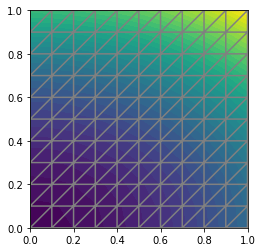

In [20]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)
# Plot solution and mesh
u.rename('u', 'solution')
plot(u)
plot(mesh)
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')
# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
# Print errors
print('error_L2 =', error_L2)
print('error_max =', error_max)

In [17]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

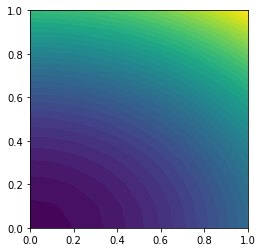

In [25]:
plot(u)